### Data Analysis
- 원시(원본 그대로) 데이터를 분석하여 인사이트(가시성 증가 및 깊은 이해)로 변환하는 작업이다.
- 문제를 해결하기 위해 데이터를 사용해서 흐름 및 방향을 찾는 기술이다.
- 데이터 분석을 통해 비지니스 프로세스를 구성하고, 의사 결정을 개선하며, 비지니스 성장을 증진할 수 있다.

<img src="./images/architecture.png" width="900px" style="margin-left: 10px;">
** <sub>ETL은 Extract(추출), Transform(변환), Load(적재)를 의미한다. 여기저기 흩어진 데이터를 하나로 모으기 위한 결합 과정이다.</sub>


### 기초 통계 (Basic statistics)
📌 통계는 아직 발생하지 않은 일을 예측하기 위해 사용한다.

- 통계학을 공부하는 데 있어 필요한 기본 개념이고,  
  수량적인 비교를 기초로 많은 사실을 관찰하고 처리하는 방법을 연구하는 학문이다.
- 불균형 데이터를 대상으로 규칙성과 불규칙성을 발견한 뒤 실생활에 적용할 수 있다.

<img src="./images/statistics01.png" style="margin-top: 20px">

#### 변량 (Variable)
- 자료의 수치를 변량이라고 하며, 이는 데이터의 값을 의미한다.

In [2]:
# 지역 별 총 100명의 키
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(151, 190, size=(10, 10)), \
                  columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))
display(df)

,서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원
0,166,176,173,154,178,151,180,184,166,167
1,164,163,161,181,189,173,159,158,157,154
2,152,153,170,180,170,157,164,182,168,169
3,168,180,158,174,161,153,183,175,152,162
4,182,166,158,182,152,158,181,165,168,157
5,189,183,183,182,153,164,167,188,171,165
6,178,161,153,155,165,176,184,170,183,156
7,188,186,154,153,176,166,152,164,157,170
8,154,155,183,164,182,163,185,177,155,180
9,180,176,160,177,187,159,185,188,184,189


In [9]:
%%timeit -n 100 -r 10
# 지역 별 총 100명의 키
import pandas as pd
import numpy as np
import random

df = pd.DataFrame([[random.randrange(151, 190) for _ in range(10)] for _ in range(10)], \
                  columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))

# np이 더 효율적임

151 µs ± 16.6 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


#### 계급 (Class)
- 변량을 일정 간격으로 나눈 구간을 의미한다.
- 변량을 최솟값과 최댓값을 잘 고려해서 계급을 정해야 한다.
- 예를 들어, 150 ~ 160 계급이 있을 경우, 160까지 속한다. 즉, 151 ~ 160 까지 이다.

In [14]:
df_seoul = df['서울']
df_class = pd.cut(df_seoul, bins=[150, 160, 170, 180, 190])
df_seoul_class = pd.DataFrame({'서울': df_seoul, '계급': df_class})
df_seoul_class

,서울,계급
0,167,"(160, 170]"
1,170,"(160, 170]"
2,177,"(170, 180]"
3,160,"(150, 160]"
4,160,"(150, 160]"
5,163,"(160, 170]"
6,171,"(170, 180]"
7,181,"(180, 190]"
8,169,"(160, 170]"
9,151,"(150, 160]"


#### 도수 (Frequency)
- 각 계급에 속하는 변량의 개수를 의미한다.

In [16]:
df_seoul_class.groupby('계급', observed=True).count()
# False 시 모든 카테고리 보여주기

,서울
계급,
"(150, 160]",3
"(160, 170]",4
"(170, 180]",2
"(180, 190]",1


#### 상대 도수 (Relative frequency)
- 각 계급에 속하는 변량의 비율을 의미한다.

In [18]:
df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x / 100)

,서울
계급,
"(150, 160]",0.03
"(160, 170]",0.04
"(170, 180]",0.02
"(180, 190]",0.01


#### 도수분포표(Frequency table)
- 주어진 자료를 계급별로 나눈 뒤 각 계급에 속하는 도수 및 상대 도수를 조사한 표이다.
- 구간 별 분포를 한번에 알아보기 좋지만, 계급 별 각 변량의 정확한 값이 생략되어 있다.

In [21]:
freq_df = pd.DataFrame({"도수": df_seoul_class.groupby('계급', observed=False).count()["서울"], \
             "상대 도수": df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x / 100)["서울"]})

display(freq_df)

,도수,상대 도수
계급,,
"(150, 160]",3,0.03
"(160, 170]",4,0.04
"(170, 180]",2,0.02
"(180, 190]",1,0.01


In [26]:
freq_df.reset_index(drop=False)
# True시 기존 인덱스 날라감

,계급,도수,상대 도수
0,"(150, 160]",3,0.03
1,"(160, 170]",4,0.04
2,"(170, 180]",2,0.02
3,"(180, 190]",1,0.01


#### 히스토그램 (Histogram)
- 도수분포표를 시각화한 그래프이다.

<Axes: >

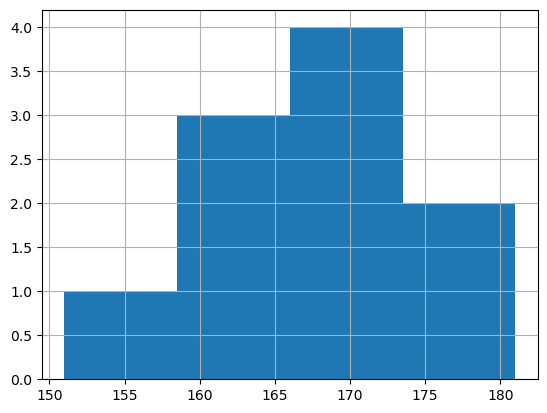

In [29]:
import matplotlib.pyplot as plt
import numpy as np

df_seoul_class["서울"].hist(bins=4)

#### 산술 평균 (Mean)
- 변량의 합을 변량의 수로 나눈 값을 의미한다.

<img src="./images/mean.png" style="margin-left:20px">

In [30]:
df.mean(axis=0).to_frame(name='평균 키')

,평균 키
서울,166.9
경기,169.1
인천,171.5
광주,168.0
대구,163.3
부산,169.1
전주,173.5
강릉,176.4
울산,164.2
수원,171.5


#### 편차 (Deviation)
- 변량에서 평균을 뺀 값이다.
- 각 변량의 편차를 구한 뒤 모두 합하면 0이 되기 때문에 편차의 평균은 구할 수 없다.

In [39]:
gyeonggi_df = df['경기'].to_frame()
gyeonggi_df['편차'] = gyeonggi_df["경기"].apply(lambda x: x - gyeonggi_df.mean())

display(gyeonggi_df)

# e가 붙어있는 수는 엄청 작은 수나 엄청 큰 수를 간략화 해주는 기능
# 이 때 E는 자연상수가 아니며, 과학적 기수법 e라고 한다.
# (a)e(b) = a * 10^b

print(gyeonggi_df['편차'].sum())

# 실수의 오류를 원래의 값으로 변경하고자 반올림(round) 사용
total = round(gyeonggi_df['편차'].sum())
print(f'편차의 합: {total}')

,경기,편차
0,186,16.9
1,160,-9.1
2,183,13.9
3,171,1.9
4,152,-17.1
5,159,-10.1
6,180,10.9
7,162,-7.1
8,162,-7.1
9,176,6.9


5.684341886080802e-14
편차의 합: 0


In [40]:
df.describe()

,서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,166.900000,169.100000,171.500000,168.000000,163.300000,169.100000,173.500000,176.400000,164.200000,171.500000
std,8.786985,11.675711,10.669271,7.468452,11.518584,11.845768,11.955938,8.181279,9.566144,11.692828
min,151.000000,152.000000,151.000000,156.000000,151.000000,152.000000,152.000000,161.000000,152.000000,152.000000
25%,160.750000,160.500000,169.250000,162.750000,155.000000,160.750000,171.750000,173.500000,158.000000,166.750000
50%,168.000000,166.500000,171.000000,169.500000,160.500000,164.500000,176.500000,178.500000,162.000000,173.000000
75%,170.750000,179.000000,178.750000,172.500000,169.500000,177.750000,178.750000,181.750000,169.750000,179.750000
max,181.000000,186.000000,185.000000,180.000000,189.000000,188.000000,187.000000,187.000000,179.000000,186.000000


#### 분산 (Variance)
- 변량이 평균으로부터 떨어져 있는 정도를 보기 위한 통계량이다.
- 편차에 제곱하여 그 합을 구한 뒤 산술 평균을 낸다.

<img src="./images/variance.png" style="margin-left:10px">

In [45]:
gyeonggi_df["편차의 제곱(분산)"] = gyeonggi_df['편차'].apply(lambda x: x**2)

display(gyeonggi_df)

variance = gyeonggi_df['편차의 제곱(분산)'].mean()
print(f'분산: {round(variance, 2)}')

,경기,편차,편차의 제곱(분산)
0,186,16.9,285.61
1,160,-9.1,82.81
2,183,13.9,193.21
3,171,1.9,3.61
4,152,-17.1,292.41
5,159,-10.1,102.01
6,180,10.9,118.81
7,162,-7.1,50.41
8,162,-7.1,50.41
9,176,6.9,47.61


분산: 122.69


#### 표준편차 (Standard deviation)
- 분산의 제곱근이며, 관측된 변량의 흩어진 정도를 하나의 수치로 나타내는 통계량이다.
- 표준편차가 작을 수록 평균 값에서 변량들의 거리가 가깝다고 판단한다.

<img src="./images/standard_deviation.png" style="margin-left: 15px">

In [46]:
import math

std = math.sqrt(variance)
print(f'표준편차: {std}')

표준편차: 11.076551810017412


#### 확률변수 (Random variable)
- 머신러닝, 딥러닝 등 확률을 다루는 분야에 있어서 필수적인 개념이다.
- 확률(probability)이 있다는 뜻은 사건(event)이 있다는 뜻이며,  
  시행(trial)을 해야 시행의 결과인 사건(event)이 나타난다.
- 시행(trial)을 해서 어떤 사건(event)이 나타났는지에 따라 값이 정해지는 변수이다.
- 알파벳 대문자로 표현하며, X, Y, Z 또는 X<sub>1</sub>, X<sub>2</sub>, X<sub>3</sub>과 같이 표현한다.
- 확률변수는 집합이며, 원소를 확률변수값(Value of random variable)이라고 표현한다.  
  확률변수에서 사용한 알파벳의 소문자를 사용한다.
- Y = { y<sub>1</sub>, y<sub>2</sub>, y<sub>3</sub> }, 이때 Y는 확률변수이고 원소인 y<sub>1</sub> ~ y<sub>3</sub>은 확률변수 값이다.

<img src="./images/random_variable.jpg" width="700px" style="margin-left:15px">

#### 범주형 확률변수 (Categorical random variable)
- 범주형 확률변수값은 수치가 아닌 기호나 언어, 숫자 등으로 표현하고 기호나 언어는 순서를 가질 수도 있다.
- 유한집합으로 표현한다. 유현집합은 원소의 수가 유한한 집합을 의미한다.
- {앞면, 뒷면}, {동의, 비동의}, {선택, 미선택}, {봄, 여름, 가을, 겨울}

#### 이산형 확률변수 (Discrete random variable)
- 이산형 확률변수값은 수치로 표현하고 셀 수 있는 값이다.  
  이를 더 넓은 범위로, 양적 확률 변수 또는 수치형 확률변수라고도 부른다.
- 유한집합 또는 셀 수 있는 무한집합으로 표현한다. 무한집합은 원소의 수가 무한한 집합을 의미한다.
- {0, 1, 2, 3}, {10, 20, 30}, {1, 2, 3, ...}, {100, 1000, 10000}

#### 연속성 확률변수 (Continuous random variable)
- 연숙형 확률변수는 구간을 나타내는 구치로 표현한다.  
  이를 더 넓은 범위로, 양적 확률변수 또는 수치형 확률변수라고도 부른다.
- 셀 수 없는 무한집합으로 표현한다.
- 128.56 < X < 268.56

#### 확률분포 (Probability distribution)
- 사건에 대한 확률변수에서 정의된 모든 확률값의 분포이며, 서로 다른 모든 결과의 출현 확률을 제공한다.
> <strong>1) 동전 던지기(시행)</strong>  
> <strong>2) { 0, 1 } (확률변수와 확률변수값) </strong>  
> <strong>3) 완벽한 형태의 동전일 경우 확률 분포 </strong>  
>
> <img src="./images/probability_distribution01.png">  
> 
> 
> <strong>1) 1 ~ 12까지 새겨진 주사위 던지기 (시행)</strong>  
> <strong>2) { 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 } (확률변수와 확률변수값) </strong>  
> <strong>3) 완벽한 형태의 주사일 경우 확률 분포 </strong>  
>
> <img src="./images/probability_distribution02.png">

In [1]:
import numpy as np
import pandas as pd

df_h_dist = pd.DataFrame(np.arange(0, 100) % 4 + 1, columns=['경주마 번호'])

df_h_dist_group = df_h_dist.groupby('경주마 번호')["경주마 번호"].count().reset_index(name="1등 횟수")

df_h_dist_group['1등할 확률'] = df_h_dist_group['1등 횟수'] / 100
display(df_h_dist_group)

,경주마 번호,1등 횟수,1등할 확률
0,1,25,0.25
1,2,25,0.25
2,3,25,0.25
3,4,25,0.25


#### 확률분포함수 (Probability distribution function)
- 확률변수의 분포를 나타내는 함수로서, 확률변수의 확률변수값이 나올 확률을 나타내는 함수이다.
- 확률질량함수, 확률밀도함수 등의 함수가 있다.

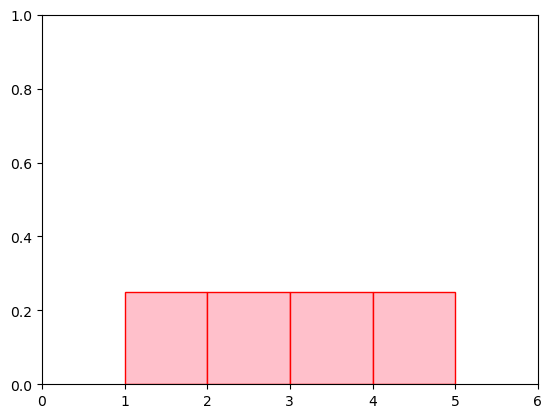

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h_dist['경주마 번호'], range(1, 6), density=True, color='pink', edgecolor="red")
plt.xlim(0,6)
plt.ylim(0,1)
plt.show()

#### 확률질량 함수 (Probability mass function, pmf)
- 확률변수 X의 분포를 나타내는 함수로서, x<sub>i</sub>가 나올 확률이다.
- 확률변수의 값을 매개변수로 전달받고, 해당 값이 나타날 확률을 구해서 리턴하는 함수이다.
- 범주형 확률변수와 이산형 확률변수에서 사용된다.
- 확률변수에서 각 값에 대한 확률을 나타내는 것이 마치 각 값이 "질량"을 가지고 있는 것처럼 보이기 때문에 확률질량 함수로 불린다.

> 확률질량 함수 f는 확률변수 X가 x를 변수값으로 가질 때의 확률이다.  
> <img src="./images/pmf01.png" style="margin-top: 10px">  
> <img src="./images/pmf02.png" style="margin-top: 10px">  
> <img src="./images/pmf03.png" style="margin-top: 10px">

In [12]:
import numpy as np
import pandas as pd

df_h = pd.DataFrame(np.random.randint(1, 5, size=(100, 1)), columns=["경주마 번호"])

df_h_group = df_h.groupby("경주마 번호")["경주마 번호"].count().reset_index(name="1등 횟수")

df_h_group["1등할 확률"] = df_h_group["1등 횟수"] / 100

display(df_h_group)

,경주마 번호,1등 횟수,1등할 확률
0,1,18,0.18
1,2,25,0.25
2,3,28,0.28
3,4,29,0.29


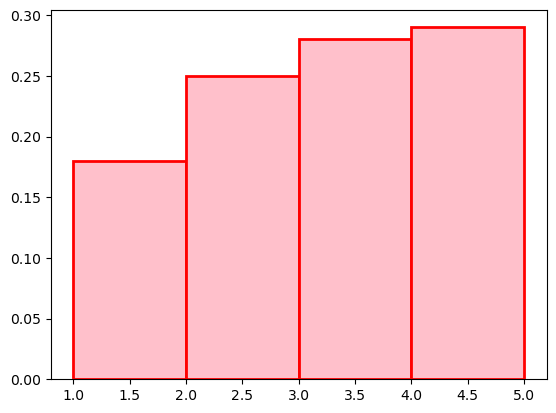

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h['경주마 번호'], range(1, 6), density=True\
         , color='pink', edgecolor='red', linewidth=2)

plt.show()

#### 무한대 (Infinity)
- 끝없이 커지는 상태를 의미하고 기호로 ∞를 사용한다.

#### 무한소 0 (Infinitesimal)
- 거의 없다는 의미이고, 0에 매우 근접하지만 0이 아닌 상태를 의미한다.

#### 미분 (Differential)
- 기울기는 독립변수가 종속변수에 미치는 영향력의 크기를 의미한다.
- 변경 전의 독립변수 x<sub>1</sub>이라는 점과 변경 후의 x<sub>2</sub>라는 점을 지나는 직선의 기울기가 바로 변화에 대한 속도이다.
- 즉, 직선의 기울기가 4로 구해졌다면, 종속변수가 독립변수의 변화에 4배 속도로 변화된 것이다.
- 이 때, 두 점 사이가 무한히 가까워지면, 결국 거의 한 점과 같은 점에 대한 접선의 기울기가 되고 이는 순간적인 변화량이다.
- 미분을 통해서 독립변수가 굉장히 미세하기 변화할 때 순간적으로 종속변수가 얼마나 빠르게 변화하는 지를 알 수 있다.

#### 적분 (Integral)
- 선분 = 높이(길이), 면적 = 가로 X 높이
- 면적을 구할 때 여러 사격형으로 나눈 뒤 합하여도 전체 면적이 나온다.
- 가로가 무한소 0인 사각형 즉, 선분과 거의 비슷한 사각형을 쌓은 뒤, 각 면적을 모두 합하는 것이 적분이다.

#### 확률밀도 함수(Probability density function, pdf)
- 확률변수 X의 분포를 나타내는 함수로서, 특정 구간에 속할 확률이고 이는 특정 구간을 적분한 값이다.
- 확률변수값의 범위(구간)를 매개변수로 전달받고, 범위의 넓이를 구해서 리턴하는 함수이다.
- 연속형 확률변수에서 사용된다.
- 전체에 대한 확률이 아닌 구간에 포함될 확률을 나타내기 때문에 구간에 따른 밀도를 구하는 것이고, 이를 통해 확률밀도 함수라 불린다.

> 확률밀도 함수는 f는 특정 구간에 포함될 확률을 나타낸다.  
> <img src="./images/pdf01.png" style="maring-top=10px">  
> <img src="./images/pdf02.png" style="maring-top=10px">  
> <img src="./images/pdf03.png" style="maring-top=10px">  
> <img src="./images/pdf04.png" style="maring-top=10px">

구간 [-1, 2]에서의 확률: 0.8185946141203638


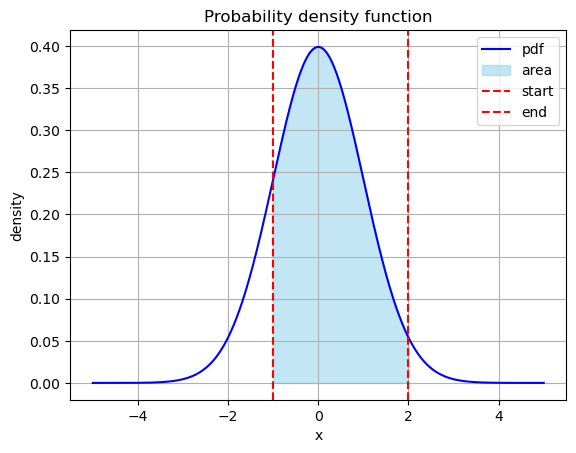

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 임의의 확률밀도 함수 정의
def pdf(x):
    # 정규분포
    mu = 0
    sigma = 1
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) / sigma) ** 2 / 2)

# 랜덤한 구간
a = -1
b = 2

def calculate_probability_in_range(a, b):
    probability, _ = quad(pdf, a, b)
    return probability

probability = calculate_probability_in_range(a, b)
print(f'구간 [{a}, {b}]에서의 확률: {probability}')

x_values = np.linspace(-5, 5, 10000)
y_values = pdf(x_values)

plt.plot(x_values, y_values, label='pdf', color='blue')
plt.fill_between(x_values, y_values\
                 , where=(x_values >= a) & (x_values <= b)\
                 , color='skyblue', alpha=0.5, label='area')
plt.axvline(x=a, linestyle='--', color='red', label='start')
plt.axvline(x=b, linestyle='--', color='red', label='end')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Probability density function')
plt.legend()
plt.grid(True)
plt.show()